# e.g. 5: Set up a multi forecast script.

# initially examine nino indice, but adapt to work on any dimensional variable.

# might want to create output file that is written to as the system goes along so that it can be restarted, or examined part of the way through the processing?

# want to create variable which gives time after forecast, so that a plot of forecast start date V lead time can be generated. Perhaps we can look at particular ENSO events to see impact of ensemble as well as other statistics.

# want to create plots (e.g. bar diagram) summarising forecasts and their dates

# last edited 30 August 2018

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
print('BEGIN')

import socket
import re
import os
import sys
import inspect
import pickle
import glob
import bz2

print('sys.version=',sys.version)

hostname=socket.gethostname()

print('hostname=',hostname)

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy as np
import numpy.ma as ma
from matplotlib.mlab import griddata
import itertools
from multi_forc_funcs import multi_forc_funcs

cafe_experiment_titles = {4:'v0_forecast', 1:'v1_forecast', 3:'v2_forecast', 9:'v1', \
  5:'v2', 6:'v3', 7:'aug17p', 2:'v1_assim', 10:'etkf', 11:'nov17n', 12:'jul18b', 13:'v0'}

%matplotlib inline

CRED = '\033[91m'
CEND = '\033[0m'

output_files_name='eg5_files.pkl'
input_files_name=output_files_name

print('END')

BEGIN
sys.version= 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
hostname= oa-35-cdc
END


In [ ]:
print('BEGIN')

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
  import socket
  import re
  import os
  import sys

  print('sys.version=',sys.version)

  hostname=socket.gethostname()

  print('hostname=',hostname)

  if(re.match('raijin',hostname)):
    print('this is rajin')
    rundir='/short/v14/mac599/cafepp/rundir'
    topdir=''
  elif(re.match('oa-3.-cdc',hostname)):
    print('this is vm32')
    rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
    topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'
    topdir_ncep='/OSM/CBR/OA_DCFP/data/CAFEPP/'
  else:
    raise SystemExit('host not known:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  os.chdir(rundir)

  os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

  print('Current Working Directory=',os.getcwd())
#===============================================================================
  
  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number, \
    shade_2d_curvilinear, \
    shade_2d_simple, \
    nino_indices, \
    plot_xy, \
    restrict_input_files, \
    cmor_ripf_parts, \
    cmor_directory_parts, \
    cmor_file_parts, \
    file_spec_summary, \
    file_sort_ripf

  from n_data_funcs import n_data_funcs

#===============================================================================

  ivar_str_forc='tos'
  dvar=ivar_str_forc
  grid_label='gn'
  years=range(2003,2003+1) #2002,2016+1

  forc_files_string=[]
  for icnt,year in enumerate(years):
    #to match all ensembles 1-11 use r*[0,1,2,3,4,5,6,7,8,9]i1p1f1
    forc_files_string.append(glob.glob('/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r*i1p1f1/Omon/'+dvar+'/'+grid_label+'/v20171025/'+dvar+ \
      '_Omon_historical_CAFE-1-0_r*[0,1,2,3,4,5,6,7,8,9]i1p1f1_'+grid_label+'_'+str(year)+'??-??????.nc'))
  merged = sorted(list(itertools.chain.from_iterable(forc_files_string)))
  forc_input_files=sorted(restrict_input_files(merged,24,60)) #72
  
  print('forc_input_files=',forc_input_files)

#===============================================================================

  ivar_str_ncepr2='skt';ifil_prefix_ncepr2='skt';offset=0.0;scale=1.0;long_name='Surface Temperature';units='degC'
  idir=topdir_ncep+'short/r67/mac599/data/NCEP_R1'
  ncepr2_input_files=[[idir+'/'+ifil_prefix_ncepr2+'.mon.mean.nc']]
  
  if(not os.path.exists(ncepr2_input_files[0][0])):
      raise SystemExit('Input file doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  print('ncepr2_input_files=',ncepr2_input_files)

#===============================================================================

  grid_label='gn'      
  ivar_str_assim='tos';table='Omon'

  ensemble=1
  pval=2 #v1_assim
  assim_input_files=[]
  idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+ \
    '/'+ivar_str_assim+'/'+grid_label+'/v20171025'
  monthly_ifils_assim=[ivar_str_assim+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
    grid_label+'_200201-201512.nc']
  for file in monthly_ifils_assim:
    if(not os.path.exists(idir+'/'+file)):
      raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    else:
      assim_input_files.append(idir+'/'+file)
  assim_input_files=[assim_input_files]
  
  print('assim_input_files=',assim_input_files)
  
#===============================================================================

print('END')

In [ ]:
print('BEGIN')

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):

  #Clobber=False
  Clobber=True

  if(Clobber):

    print(CRED+'overwriting output PKL file '+output_files_name+' and regenerating...'+CEND)

    pkl_objects=( \
      forc_input_files, assim_input_files, ncepr2_input_files)

  if((os.path.exists(output_files_name) and Clobber) or (not os.path.exists(output_files_name))):
    print(CRED+'Pkl file exists and deleting...'+CEND)

    if(os.path.exists(output_files_name)): os.remove(output_files_name)

    pickling_out = open(output_files_name, "wb")
    pickle.dump( pkl_objects, pickling_out, protocol=4)
    
    #pickle.dump(d, open("file", 'w'), protocol=4)
    
    pickling_out.close()

  if(os.path.exists(output_files_name) and not Clobber):
    print(CRED+'Pkl file exists and keeping...'+CEND)
    
print('END')

BEGIN
len(datetime)= 132
len(datetime_uniq)= 12
len(ripf)= 132
len(ripf_uniq)= 11
# datetime count:
0 200301-200712 11
1 200302-200501 11
2 200303-200502 11
3 200304-200503 11
4 200305-200504 11
5 200306-200505 11
6 200307-200806 11
7 200308-200507 11
8 200309-200508 11
9 200310-200509 11
10 200311-200510 11
11 200312-200511 11
# ripf count:
0 r10i1p1f1 12
1 r11i1p1f1 12
2 r1i1p1f1 12
3 r2i1p1f1 12
4 r3i1p1f1 12
5 r4i1p1f1 12
6 r5i1p1f1 12
7 r6i1p1f1 12
8 r7i1p1f1 12
9 r8i1p1f1 12
10 r9i1p1f1 12
Processing Obs...
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
len(boxes)= 4
boxes= ('Ni$\\~{n}$o3.4,$^{o}C$,-5,5,190,240', 'Ni$\\~{n}$o3,$^{o}C$,-5,5,210,270', 'Ni$\\~{n}$o4,$^{o}C$,-5,5,160,210', 'Ni$\\~{n}$o1+2,$^{o}C$,-10,0,270,280')
 latmin,latmax= [-5.0, -5.0, -5.0, -10.0] [5.0, 5.0, 5.0, 0.0]  self.jmin,self.jmax= [44, 44, 44, 47] [49, 49, 49, 52]  lonmin,lonmax= [190.0, 210.0, 160.0, 270.0] [240.0, 270.0, 210.0, 280.

Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 6 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 71 0 846
_Obs_quantity_monthly_from_monthly.shape= (204, 4)
Processing CAFE assim ...
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
len(boxes)= 4
boxes= ('Ni$\\~{n}$o3.4,$^{o}C$,-5,5,190,240', 'Ni$\\~{n}$o3,$^{o}C$,-5,5,210,270', 'Ni$\\~{n}$o4,$^{o}C$,-5,5,160,210', 'Ni$\\~{n}$o1+2,$^{o}C$,-10,0,270,280')
 latmin,latmax= [-5.0, -5.0, -5.0, -10.0] [5.0, 5.0, 5.0, 0.0]  self.jmin,self.jmax= [121, 121, 121, 106] [152, 152, 152, 137]  lonmin,lonmax= [190.0, 210.0, 160.0, 270.0] [240.0, 270.0, 210.0, 280.0]  self.imin,self.imax= [109, 129, 79, 189] [159, 189, 12

xxx [0.21001751720905304 0.21422873437404633 0.21845482289791107
 0.22270065546035767 0.22698231041431427 0.23130424320697784
 0.23568254709243774 0.24012157320976257 0.24463649094104767
 0.24923200905323029 0.25392234325408936 0.2587117552757263
 0.2636145055294037 0.26863402128219604 0.27378395199775696
 0.2790668308734894 0.28449615836143494 0.2900736927986145
 0.29581165313720703 0.3017118275165558 0.30778512358665466
 0.3140324056148529 0.32046422362327576 0.32708001136779785
 0.33388927578926086 0.3408907353878021 0.3480929434299469
 0.35549330711364746 0.3630991280078888 0.37090691924095154
 0.3789229094982147 0.38714227080345154 0.39556992053985596
 0.40419989824295044 0.41303572058677673 0.42207029461860657
 0.43130579590797424 0.44073399901390076 0.4503554403781891
 0.46016058325767517 0.4701490104198456 0.4803095757961273
 0.49064046144485474 0.5011295676231384 0.5117735862731934
 0.5225591659545898 0.5334818363189697 0.544526994228363
 0.5556889176368713 0.5669522285461426 

Diag= False
monthly_clim_anom: All years have 12 months.
_cafe_quantity_monthly_from_monthly_assim.shape= (168, 4)
Processing CAFE forc v1 ...
calculate_filedatetime_info_multiforc: Forecast start times go from  731245.5 to 733223.0 or 2003-01-16 12:00:00 to 2008-06-16 00:00:00
_ybeg,_yend_all_inputs= 2001 2017
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
len(boxes)= 4
boxes= ('Ni$\\~{n}$o3.4,$^{o}C$,-5,5,190,240', 'Ni$\\~{n}$o3,$^{o}C$,-5,5,210,270', 'Ni$\\~{n}$o4,$^{o}C$,-5,5,160,210', 'Ni$\\~{n}$o1+2,$^{o}C$,-10,0,270,280')
 latmin,latmax= [-5.0, -5.0, -5.0, -10.0] [5.0, 5.0, 5.0, 0.0]  self.jmin,self.jmax= [121, 121, 121, 106] [152, 152, 152, 137]  lonmin,lonmax= [190.0, 210.0, 160.0, 270.0] [240.0, 270.0, 210.0, 280.0]  self.imin,self.imax= [109, 129, 79, 189] [159, 189, 129, 199]  actual: latmin,latmax= [-5.167124271392822 -5.167124271392822 -5.167124271392822
 -10.16620922088623] [5.167124271392

Diag= False
monthly_clim_anom: There are missing months in the set. 5 at beginning and 7 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 5 29
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
len(boxes)= 4
boxes= ('Ni$\\~{n}$o3.4,$^{o}C$,-5,5,190,240', 'Ni$\\~{n}$o3,$^{o}C$,-5,5,210,270', 'Ni$\\~{n}$o4,$^{o}C$,-5,5,160,210', 'Ni$\\~{n}$o1+2,$^{o}C$,-

len(boxes)= 4
boxes= ('Ni$\\~{n}$o3.4,$^{o}C$,-5,5,190,240', 'Ni$\\~{n}$o3,$^{o}C$,-5,5,210,270', 'Ni$\\~{n}$o4,$^{o}C$,-5,5,160,210', 'Ni$\\~{n}$o1+2,$^{o}C$,-10,0,270,280')
 latmin,latmax= [-5.0, -5.0, -5.0, -10.0] [5.0, 5.0, 5.0, 0.0]  self.jmin,self.jmax= [121, 121, 121, 106] [152, 152, 152, 137]  lonmin,lonmax= [190.0, 210.0, 160.0, 270.0] [240.0, 270.0, 210.0, 280.0]  self.imin,self.imax= [109, 129, 79, 189] [159, 189, 129, 199]  actual: latmin,latmax= [-5.167124271392822 -5.167124271392822 -5.167124271392822
 -10.16620922088623] [5.167124271392822 5.167124271392822 5.167124271392822 0.16620922088623047]  actual: lonmin,lonmax= [189.5 209.5 159.5 269.5] [239.5 269.5 209.5 279.5]
calculate_quantity: value_split= ['z20']
Diag= False
monthly_clim_anom: There are missing months in the set. 11 at beginning and 1 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to m

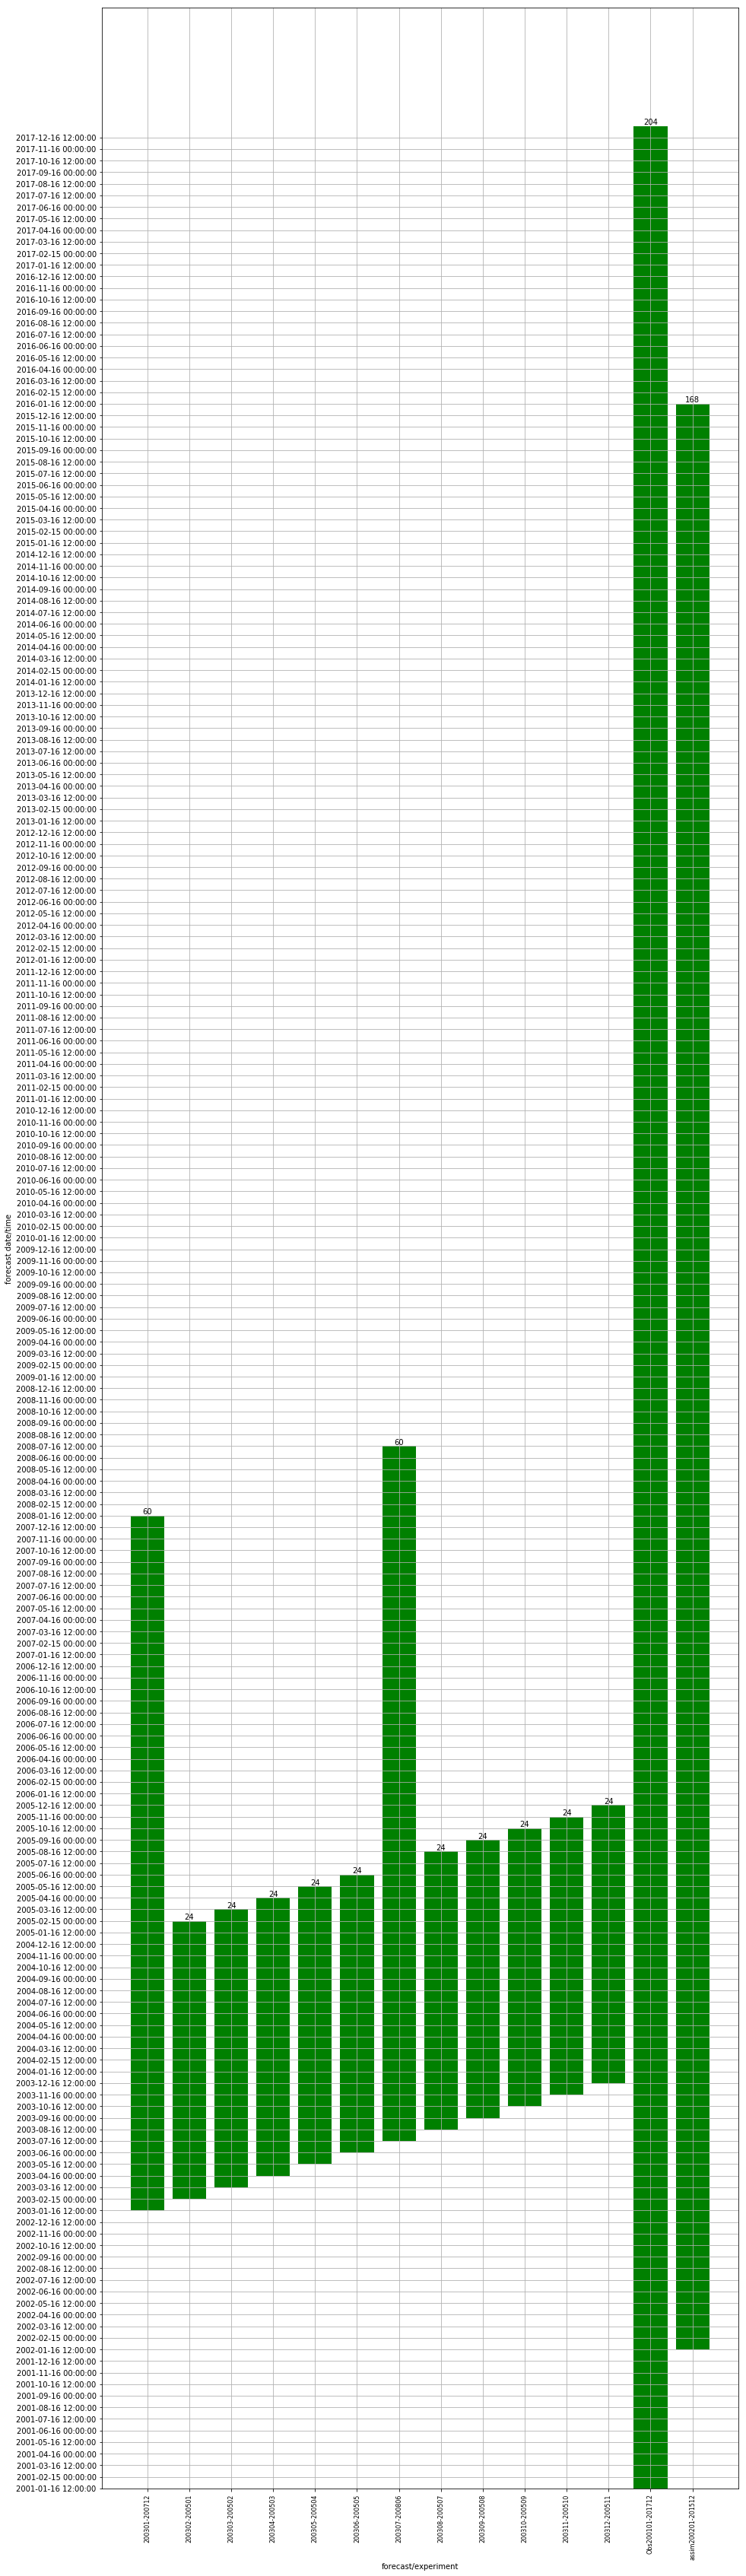

saving to PKL file eg5_data.pkl...
Pkl file exists and deleting...
END


In [6]:
print('BEGIN')

from decadal_diag import \
  file_spec_summary

if(os.path.exists(input_files_name)):
  pickling_in = open(input_files_name, "rb")
  forc_input_files, assim_input_files, obs_input_files \
  = pickle.load(pickling_in)
  pickling_in.close()
  
#print(forc_input_files, assim_input_files, obs_input_files)
    
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

datetime_all,datetime_uniq,ripf_all,ripf_uniq=file_spec_summary(forc_input_files,True)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

test_v1=multi_forc_funcs(Diag=False, input_files=(forc_input_files, assim_input_files, obs_input_files))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

test_v1.calculate_filedatetime_info_multiforc(Diag=True, \
  quantity='z20', \
  ivars=('tos','tos','skt'), \
  output_pkl='eg5_data.pkl', \
  Clobber=True, \
  ObsName='ncepr2', \
  ObsCAYears=(2001,2017,2001,2017), \
  boxes=('Ni$\~{n}$o3.4,$^{o}C$,-5,5,190,240', 'Ni$\~{n}$o3,$^{o}C$,-5,5,210,270', 'Ni$\~{n}$o4,$^{o}C$,-5,5,160,210', 'Ni$\~{n}$o1+2,$^{o}C$,-10,0,270,280'))

#test_v1.calculate_filedatetime_info_multiforc(Diag=True, quantity='latlon_region', ivars=('skt','tos','tos'))

print('END')

BEGIN
reading from PKL file eg5_data.pkl...
time_beg_index_keep= [24 25 26 27 28 29 30 31 32 33 34 35 0 12]
time_end_index_keep= [83 48 49 50 51 52 89 54 55 56 57 58 203 179]
quantity_monthly_ensemble.shape= (204, 11, 12, 4)
quantity_monthly_obs.shape= (204, 4)
quantity_monthly_assim.shape= (204, 4)
year_fraction_monthly_full.size= 204
datetime_uniq= ['200301-200712', '200302-200501', '200303-200502', '200304-200503', '200305-200504', '200306-200505', '200307-200806', '200308-200507', '200309-200508', '200310-200509', '200311-200510', '200312-200511', 'Obs200101-201712', 'assim200201-201512']
len(datetime_uniq)= 14
time_units= days since 0001-01-01 00:00:00
time_calendar= julian
years_months_full= [200101, 200102, 200103, 200104, 200105, 200106, 200107, 200108, 200109, 200110, 200111, 200112, 200201, 200202, 200203, 200204, 200205, 200206, 200207, 200208, 200209, 200210, 200211, 200212, 200301, 200302, 200303, 200304, 200305, 200306, 200307, 200308, 200309, 200310, 200311, 200312, 2004

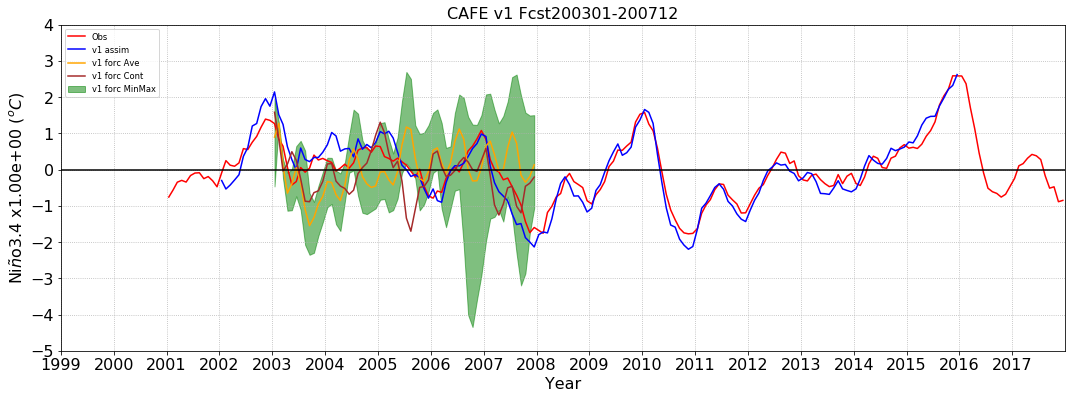

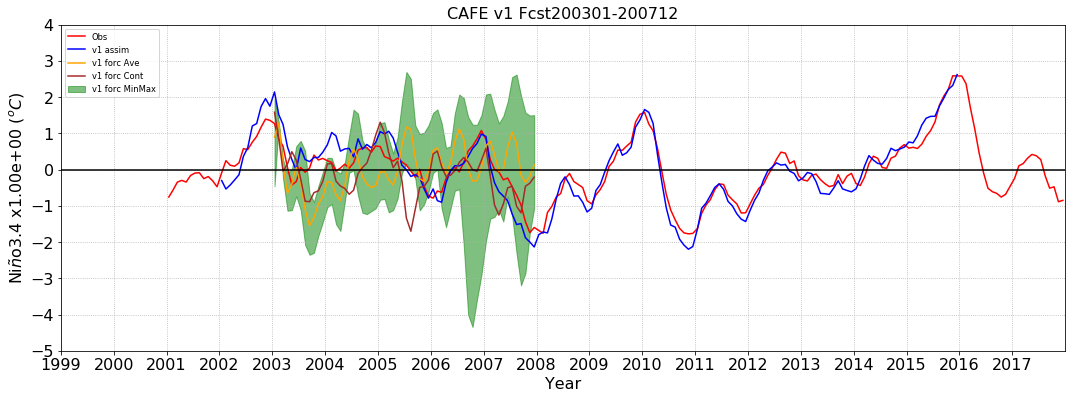

END


In [8]:
print('BEGIN')

from n_data_funcs import n_data_funcs

input_data_name='eg5_data.pkl'   

print(CRED+'reading from PKL file '+input_data_name+'...'+CEND)

from decadal_diag import check_valid_data_plot, plot_xy

if(os.path.exists(input_data_name)):
  pickling_in = bz2.BZ2File(input_data_name, "rb")
  quantity_monthly_ensemble, quantity_monthly_obs, quantity_monthly_assim, time_beg_index_keep, time_end_index_keep, \
    check_valid_data, date_full, time_full, year_fraction_monthly_full, datetime_uniq, time_units, time_calendar, \
    years_months_full, boxes, quantity \
    = pickle.load(pickling_in)
  pickling_in.close()
  
#check_valid_data_plot(Diag=False, times=date_full, forecasts=datetime_uniq, data=check_valid_data,  xysize=(15,20))

whatever_index=0

print('time_beg_index_keep=',time_beg_index_keep)
print('time_end_index_keep=',time_end_index_keep)
print('quantity_monthly_ensemble.shape=',quantity_monthly_ensemble.shape)
print('quantity_monthly_obs.shape=',quantity_monthly_obs.shape)
print('quantity_monthly_assim.shape=',quantity_monthly_assim.shape)
# print('date_full=',date_full)
# print('time_full=',time_full)
#print('year_fraction_monthly_full=',year_fraction_monthly_full)
print('year_fraction_monthly_full.size=',year_fraction_monthly_full.size)
print('datetime_uniq=',datetime_uniq)
print('len(datetime_uniq)=',len(datetime_uniq))
# print('check_valid_data=',check_valid_data)
print('time_units=',time_units)
print('time_calendar=',time_calendar)
print('years_months_full=',years_months_full)
print('len(years_months_full)=',len(years_months_full))

if(quantity=='wwv'):
  scale=1e-14
else:
  scale=1.0
  
forecast_num_to_extract=0

if(forecast_num_to_extract>len(datetime_uniq)-2-1):
  raise SystemExit('You have selected a forecast, '+str(forecast_num_to_extract)+', beyond valid range, 0:'+str(len(datetime_uniq)-2-1)+'.'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

dummy_obs = n_data_funcs(Diag=False, input_files=None, input_var_name=None, \
  dummy_mode=(False, date_full, time_full, time_units, time_calendar)) #I think boolean for dummy_mode should be False but seems to work.

# cbeg_obs=2001
# cend_obs=2010
# abeg_obs=2001
# aend_obs=2010

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

quantity_monthlyclimatology_obs, quantity_monthlyanomaly_obs= \
  dummy_obs.monthly_clim_anom( \
  Diag=False, input=quantity_monthly_obs, AnnOut=False, ZeroClim=False) #, \
#   cbeg=cbeg_obs, cend=cend_obs, abeg=abeg_obs, aend=aend_obs)

print('quantity_monthlyclimatology_obs.shape=',quantity_monthlyclimatology_obs.shape)
print('quantity_monthlyanomaly_obs.shape=',quantity_monthlyanomaly_obs.shape)

#===============================================================================

dummy_assim = n_data_funcs(Diag=False, input_files=None, input_var_name=None, \
  dummy_mode=(False, date_full, time_full, time_units, time_calendar)) #I think boolean for dummy_mode should be False but seems to work.

# cbeg_assim=2002
# cend_assim=2015
# abeg_assim=2002
# aend_assim=2015

cafe_quantity_monthlyclimatology_assim, cafe_quantity_monthlyanomaly_assim= \
  dummy_assim.monthly_clim_anom( \
  Diag=False, input=quantity_monthly_assim, AnnOut=False, ZeroClim=False) #, \
#   cbeg=cbeg_assim, cend=cend_assim, abeg=abeg_assim, aend=aend_assim)

print('cafe_quantity_monthlyclimatology_assim.shape=',cafe_quantity_monthlyclimatology_assim.shape)
print('cafe_quantity_monthlyanomaly_assim.shape=',cafe_quantity_monthlyanomaly_assim.shape)

#===============================================================================

dummy_v1forc = n_data_funcs(Diag=True, input_files=None, input_var_name=None, \
  dummy_mode=(False, date_full, time_full, time_units, time_calendar)) #I think boolean for dummy_mode should be False but seems to work.

# cbeg_v1forc=2001
# cend_v1forc=2015
# abeg_v1forc=2001
# aend_v1forc=2015

#print(quantity_monthly_ensemble.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

clim_shape_v1=[dummy_assim.nmy, *quantity_monthly_ensemble.shape[1::]]

print('clim_shape_v1=',clim_shape_v1)

#need to build up clim
clim_for_v1=ma.zeros(clim_shape_v1,dtype='f') #nmy, ensembles, forecasts, nino
for enow in range(clim_shape_v1[1]):
  for fnow in range(clim_shape_v1[2]):
    clim_for_v1[:,enow,fnow,:]=cafe_quantity_monthlyclimatology_assim #12, 4
    
print('clim_for_v1.shape=',clim_for_v1.shape)

cafe_quantity_monthlyanomaly_v1forc= \
  dummy_v1forc.monthly_clim_anom( \
  Diag=True, input=quantity_monthly_ensemble, AnnOut=False, ZeroClim=False, \
  clim=clim_for_v1) #cbeg=cbeg_v1forc, cend=cend_v1forc, abeg=abeg_v1forc, aend=aend_v1forc)
  
print('cafe_quantity_monthlyanomaly_v1forc.shape=',cafe_quantity_monthlyanomaly_v1forc.shape)
  
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

input_xvals = (dummy_obs.year_fraction_anomaly,)
input_datas = (quantity_monthlyanomaly_obs[:,whatever_index],) #obs

input_xvals = input_xvals + (dummy_assim.year_fraction_anomaly,)
input_datas = input_datas + (cafe_quantity_monthlyanomaly_assim[:,whatever_index],) #assim

input_xvals = input_xvals + (dummy_v1forc.year_fraction_anomaly,)
input_xvals = input_xvals + (dummy_v1forc.year_fraction_anomaly,)
input_xvals = input_xvals + (dummy_v1forc.year_fraction_anomaly,)
input_xvals = input_xvals + (dummy_v1forc.year_fraction_anomaly,)

#ensemble at 0 is control run, so ignore it in ensemble stats.
input_datas = input_datas + (np.min(cafe_quantity_monthlyanomaly_v1forc[:,1::,forecast_num_to_extract,whatever_index],axis=1),)
input_datas = input_datas + (np.max(cafe_quantity_monthlyanomaly_v1forc[:,1::,forecast_num_to_extract,whatever_index],axis=1),)
input_datas = input_datas + (np.average(cafe_quantity_monthlyanomaly_v1forc[:,1::,forecast_num_to_extract,whatever_index],axis=1),)
input_datas = input_datas + (cafe_quantity_monthlyanomaly_v1forc[:,0,forecast_num_to_extract,whatever_index],) #control ensemble

plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
  title='CAFE v1 Fcst'+datetime_uniq[forecast_num_to_extract], \
  units='$\!^\circ$C', \
  xlab='Year', \
  ylab=boxes[whatever_index].split(',')[0]+' x'+str('{:.2e}'.format(1.0/scale)) + ' ('+boxes[whatever_index].split(',')[1]+')', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  line_colors=['red','blue','green','orange','brown'], \
  line_labels=['Obs','v1 assim','v1 forc MinMax','v1 forc Ave','v1 forc Cont'], \
  legend_position='best', \
  fill_between=[0,1,2,2,3,4], \
  line_alphas=[1.,1.,.5,1.,1.], \
  xlim=[1999,2018], \
  xticks=np.arange(1999,2018,1), \
  grid=True, \
  grid_linestyle='dotted', \
  legend_fontsize='small', \
  xysize=(18,6))
  
#===============================================================================

#plot first diagram, but specify exact beg/end time points of each data set.

input_xvals = (dummy_obs.year_fraction_anomaly[time_beg_index_keep[-2]:time_end_index_keep[-2]+1],)
input_datas = (quantity_monthlyanomaly_obs[time_beg_index_keep[-2]:time_end_index_keep[-2]+1,whatever_index],) #obs

input_xvals = input_xvals + (dummy_assim.year_fraction_anomaly[time_beg_index_keep[-1]:time_end_index_keep[-1]+1],)
input_datas = input_datas + (cafe_quantity_monthlyanomaly_assim[time_beg_index_keep[-1]:time_end_index_keep[-1]+1,whatever_index],) #assim

input_xvals = input_xvals + (dummy_v1forc.year_fraction_anomaly[time_beg_index_keep[forecast_num_to_extract]:time_end_index_keep[forecast_num_to_extract]+1],)
input_xvals = input_xvals + (dummy_v1forc.year_fraction_anomaly[time_beg_index_keep[forecast_num_to_extract]:time_end_index_keep[forecast_num_to_extract]+1],)
input_xvals = input_xvals + (dummy_v1forc.year_fraction_anomaly[time_beg_index_keep[forecast_num_to_extract]:time_end_index_keep[forecast_num_to_extract]+1],)
input_xvals = input_xvals + (dummy_v1forc.year_fraction_anomaly[time_beg_index_keep[forecast_num_to_extract]:time_end_index_keep[forecast_num_to_extract]+1],)

#ensemble at 0 is control run, so ignore it in ensemble stats.
input_datas = input_datas + (np.min(cafe_quantity_monthlyanomaly_v1forc[time_beg_index_keep[forecast_num_to_extract]:time_end_index_keep[forecast_num_to_extract]+1,1::,forecast_num_to_extract,whatever_index],axis=1),)
input_datas = input_datas + (np.max(cafe_quantity_monthlyanomaly_v1forc[time_beg_index_keep[forecast_num_to_extract]:time_end_index_keep[forecast_num_to_extract]+1,1::,forecast_num_to_extract,whatever_index],axis=1),)
input_datas = input_datas + (np.average(cafe_quantity_monthlyanomaly_v1forc[time_beg_index_keep[forecast_num_to_extract]:time_end_index_keep[forecast_num_to_extract]+1,1::,forecast_num_to_extract,whatever_index],axis=1),)
input_datas = input_datas + (cafe_quantity_monthlyanomaly_v1forc[time_beg_index_keep[forecast_num_to_extract]:time_end_index_keep[forecast_num_to_extract]+1,0,forecast_num_to_extract,whatever_index],) #control ensemble

#print(dummy_v1forc.year_fraction_anomaly)
#print(time_beg_index_keep[forecast_num_to_extract],time_end_index_keep[forecast_num_to_extract])
#print(year_fraction_monthly_full[time_beg_index_keep[forecast_num_to_extract]:time_end_index_keep[forecast_num_to_extract]+1])
#print(dummy_v1forc.year_fraction_anomaly[time_beg_index_keep[forecast_num_to_extract]:time_end_index_keep[forecast_num_to_extract]+1])
#print(cafe_quantity_monthlyanomaly_v1forc[time_beg_index_keep[forecast_num_to_extract]:time_end_index_keep[forecast_num_to_extract]+1,0,forecast_num_to_extract,whatever_index])
       
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
  title='CAFE v1 Fcst'+datetime_uniq[forecast_num_to_extract], \
  units='$\!^\circ$C', \
  xlab='Year', \
  ylab=boxes[whatever_index].split(',')[0]+' x'+str('{:.2e}'.format(1.0/scale)) + ' ('+boxes[whatever_index].split(',')[1]+')', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  line_colors=['red','blue','green','orange','brown'], \
  line_labels=['Obs','v1 assim','v1 forc MinMax','v1 forc Ave','v1 forc Cont'], \
  legend_position='best', \
  fill_between=[0,1,2,2,3,4], \
  line_alphas=[1.,1.,.5,1.,1.], \
  xlim=[1999,2018], \
  xticks=np.arange(1999,2018,1), \
  grid=True, \
  grid_linestyle='dotted', \
  legend_fontsize='small', \
  xysize=(18,6))

print('END')

In [ ]:
j=np.corrcoef(np.array([0.5]),np.array([0.5]))
print(j)

In [ ]:
from scipy.stats.stats import pearsonr   
a = [1,2]
b = [1,2]   
print(pearsonr(a,b))

In [ ]:
boxes